<a href="https://colab.research.google.com/github/profshai/regression-models/blob/main/kaggle_bike_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Demand Prediction

We will use the multiple regression model to predict the demand for Bike.

Data comes from the UCL Machine Learning repository with 17389 samples containing hourly and daily counts of rental bikes between 2011 and 2012. The dataset has 16 features including:

1. Season (Spring-1, Summer-2, Fall-3, and Winter-4)
2. Holiday (Yes-1, No-0)
3. Weekday (Sunday to Saturday 0-6)
4. Working day (Yes-1, No-0)
5. Weather (Clear -1, Mist-2, Light snow/rain-3, Heavy rain/snow-4)
6. Temperature
7. Feels like temperature (atemp)
7. Humidity
8. Windspeed

### Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Import dataset

In [5]:
data = pd.read_csv('hour.csv')
data

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Preliminary Data Analysis

In [7]:
# 'casual' + 'registered' = 'demand' so we drop those two columns
df = data.copy()
df = df.drop(['index', 'date', 'casual', 'registered'], axis = 1)
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [8]:
#Checking for missing values
df.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

### Data Visualization

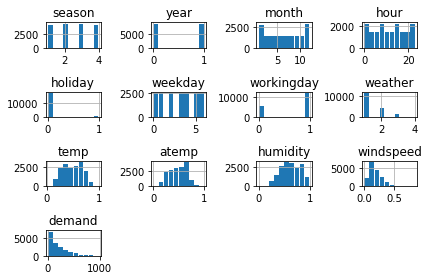

In [10]:
df.hist(rwidth=0.9)
plt.tight_layout()

We see that the 'demand' variable (dependent variable) is not normally distributed.

#### Visualize the continuous features against the demand (dependent variables)

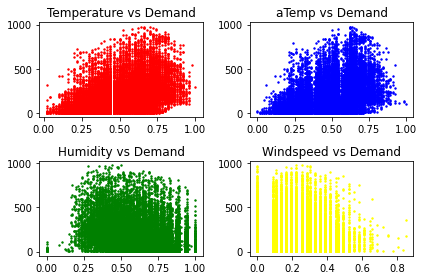

In [15]:
plt.subplot(2,2,1)
plt.title('Temperature vs Demand')
plt.scatter(df['temp'], df['demand'], s=2, c='red')

plt.subplot(2,2,2)
plt.title('aTemp vs Demand')
plt.scatter(df['atemp'], df['demand'], s=2, c='blue')

plt.subplot(2,2,3)
plt.title('Humidity vs Demand')
plt.scatter(df['humidity'], df['demand'], s=2, c='green')

plt.subplot(2,2,4)
plt.title('Windspeed vs Demand')
plt.scatter(df['windspeed'], df['demand'], s=2, c='yellow')
plt.tight_layout()
plt.show()


There appears to be a high correlation between temp and atemp.

#### Average demand

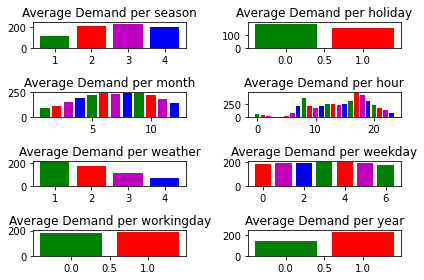

In [29]:
colors = ['g', 'r', 'm', 'b']

plt.subplot(4,2,1)
plt.title('Average Demand per season')
sea = df['season'].unique()
average_demand = df.groupby('season').mean()['demand']
plt.bar(sea, average_demand, color = colors)

plt.subplot(4,2,2)
plt.title('Average Demand per holiday')
sea = df['holiday'].unique()
average_demand = df.groupby('holiday').mean()['demand']
plt.bar(sea, average_demand, color = colors)

plt.subplot(4,2,3)
plt.title('Average Demand per month')
sea = df['month'].unique()
average_demand = df.groupby('month').mean()['demand']
plt.bar(sea, average_demand, color = colors)

plt.subplot(4,2,4)
plt.title('Average Demand per hour')
sea = df['hour'].unique()
average_demand = df.groupby('hour').mean()['demand']
plt.bar(sea, average_demand, color = colors)

plt.subplot(4,2,5)
plt.title('Average Demand per weather')
sea = df['weather'].unique()
average_demand = df.groupby('weather').mean()['demand']
plt.bar(sea, average_demand, color = colors)

plt.subplot(4,2,6)
plt.title('Average Demand per weekday')
sea = df['weekday'].unique()
average_demand = df.groupby('weekday').mean()['demand']
plt.bar(sea, average_demand, color = colors)

plt.subplot(4,2,7)
plt.title('Average Demand per workingday')
sea = df['workingday'].unique()
average_demand = df.groupby('workingday').mean()['demand']
plt.bar(sea, average_demand, color = colors)

plt.subplot(4,2,8)
plt.title('Average Demand per year')
sea = df['year'].unique()
average_demand = df.groupby('year').mean()['demand']
plt.bar(sea, average_demand, color = colors)

plt.tight_layout()
plt.show()


Based on the graphs above, we will drop 'weekday', 'workingday' and 'year'.

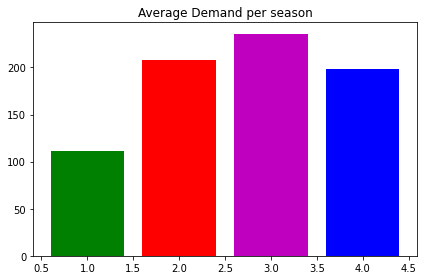

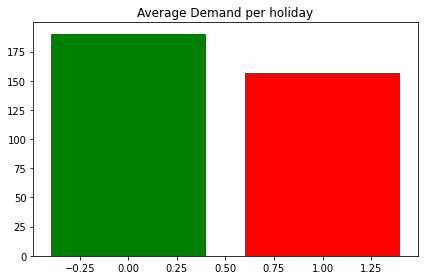

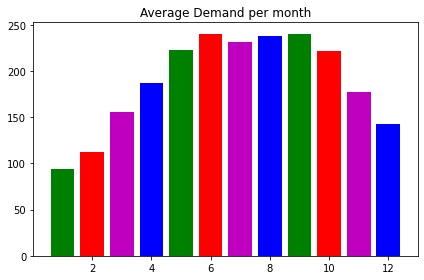

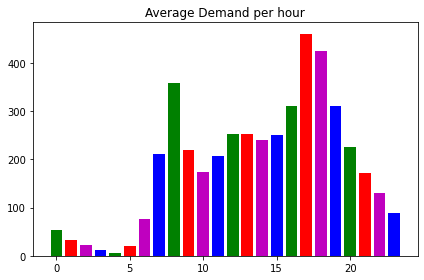

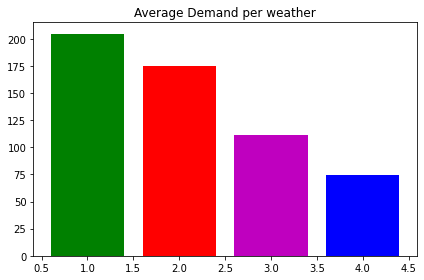

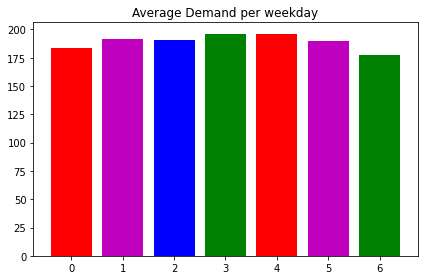

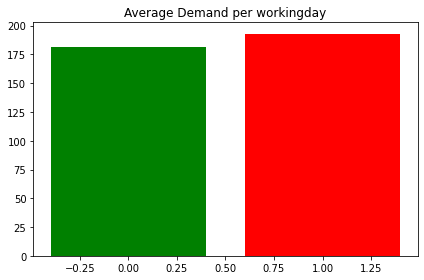

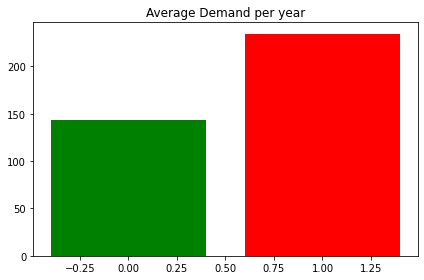

In [36]:
def graph(hello):
  plt.title(f'Average Demand per {hello}')
  sea = df[f'{hello}'].unique()
  average_demand = df.groupby(f'{hello}').mean()['demand']
  plt.bar(sea, average_demand, color = colors)
  plt.tight_layout()
  plt.show()

graph('season')
graph('holiday')
graph('month')
graph('hour')
graph('weather')
graph('weekday')
graph('workingday')
graph('year')


#### Check for outliers

### Checking the linear regression Assumptions

### Encoding variables

### Split Data into training and test data

### Train the model

### Check model performance